In [ ]:
!rm -f /content/main.zip
!wget https://raw.githubusercontent.com/Ostap-Kucher/Labs/main/main.zip

--2025-12-04 17:53:58--  https://raw.githubusercontent.com/artemthewhiteowl/whiteowl/main/main.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11264 (11K) [application/zip]
Saving to: ‘main.zip’

main.zip            100%[===================>]  11.00K  --.-KB/s    in 0s      

2025-12-04 17:53:58 (72.4 MB/s) - ‘main.zip’ saved [11264/11264]



In [3]:
!unzip /content/main.zip

Archive:  /content/main.zip
   creating: lab1-main/
  inflating: __MACOSX/._lab1-main    
  inflating: lab1-main/.DS_Store     
  inflating: __MACOSX/lab1-main/._.DS_Store  
  inflating: lab1-main/eng texts.txt  
  inflating: __MACOSX/lab1-main/._eng texts.txt  
  inflating: lab1-main/ukr texts.txt  
  inflating: __MACOSX/lab1-main/._ukr texts.txt  
  inflating: lab1-main/README.md     
  inflating: __MACOSX/lab1-main/._README.md  


In [4]:
import pandas as pd
# Читання та декодування
with open("/content/lab1-main/eng texts.txt", "r", encoding="latin-1") as f:
    raw_en = f.read()
texts_en = [block.replace("\n", " ").strip() for block in raw_en.split("\n\n") if block.strip()]

with open("/content/lab1-main/ukr texts.txt", "r", encoding="mac_cyrillic", errors="replace") as f:
    raw_uk = f.read()
texts_uk = [block.replace("\n", " ").strip() for block in raw_uk.split("\n\n") if block.strip()]

# Вирівнювання довжини
min_len = min(len(texts_en), len(texts_uk))
texts_en = texts_en[:min_len]
texts_uk = texts_uk[:min_len]

# Створення DataFrame
df = pd.DataFrame({
    "doc_id": [f"doc{i+1}" for i in range(min_len)],
    "text_en": texts_en,
    "text_uk": texts_uk
})

df.head()

,doc_id,text_en,text_uk
0,doc1,"Sleep is a fundamental biological necessity, n...",Сон є фундаментальною біологічною необхідністю...
1,doc2,The automotive industry is currently undergoin...,Автомобільна промисловість наразі переживає ма...
2,doc3,"The Great Barrier Reef, located off the coast ...","Великий Бар'єрний риф, розташований біля узбер..."
3,doc4,"Artificial Intelligence, or AI, refers to the ...","Штучний інтелект, або ШІ, стосується симуляції..."
4,doc5,Coffee is one of the world's most popular beve...,Кава є одним із найпопулярніших напоїв у світі...


In [5]:
import re
import pandas as pd

def clean_text(text: str, allowed_chars: str) -> str:
    """
    Універсальна функція для очищення тексту.

    :param text: Вхідний рядок тексту.
    :param allowed_chars: Регулярний вираз для дозволених символів.
    :return: Очищений рядок.
    """
    # Приведення до нижнього регістру
    text = text.lower()

    # Заміна заборонених символів на пробіли
    # Використовуємо f-string для динамічного створення регексу
    text = re.sub(rf"[^{allowed_chars}\s]", " ", text)

    # Уніфікація пробілів та очищення країв
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Визначення дозволених символів
ALLOWED_EN = "a-z'"
ALLOWED_UK = "а-яєіїґ'"

# Застосування до DataFrame
df["clean_en"] = df["text_en"].apply(lambda x: clean_text(x, ALLOWED_EN))
df["clean_uk"] = df["text_uk"].apply(lambda x: clean_text(x, ALLOWED_UK))

df.head()

,doc_id,text_en,text_uk,clean_en,clean_uk
0,doc1,"Sleep is a fundamental biological necessity, n...",Сон є фундаментальною біологічною необхідністю...,sleep is a fundamental biological necessity no...,сон є фундаментальною біологічною необхідністю...
1,doc2,The automotive industry is currently undergoin...,Автомобільна промисловість наразі переживає ма...,the automotive industry is currently undergoin...,автомобільна промисловість наразі переживає ма...
2,doc3,"The Great Barrier Reef, located off the coast ...","Великий Бар'єрний риф, розташований біля узбер...",the great barrier reef located off the coast o...,великий бар'єрний риф розташований біля узбере...
3,doc4,"Artificial Intelligence, or AI, refers to the ...","Штучний інтелект, або ШІ, стосується симуляції...",artificial intelligence or ai refers to the si...,штучний інтелект або ші стосується симуляції п...
4,doc5,Coffee is one of the world's most popular beve...,Кава є одним із найпопулярніших напоїв у світі...,coffee is one of the world's most popular beve...,кава є одним із найпопулярніших напоїв у світі...


In [7]:
from nltk.tokenize import RegexpTokenizer
import pandas as pd

# Створення токенізаторів
EN_TOKENIZER = RegexpTokenizer(r"[a-z']+")
UK_TOKENIZER = RegexpTokenizer(r"[а-яєіїґ']+")

def tokenize_column(series: pd.Series, tokenizer: RegexpTokenizer) -> pd.Series:
    """Обробляє стовпець, замінює NaN і застосовує токенізатор NLTK."""
    return series.fillna('').apply(tokenizer.tokenize)

# Застосування до DataFrame
# Використовуємо універсальну функцію для обох мов
df['tokens_en'] = tokenize_column(df['clean_en'], EN_TOKENIZER)
df['tokens_uk'] = tokenize_column(df['clean_uk'], UK_TOKENIZER)

df.head()

,doc_id,text_en,text_uk,clean_en,clean_uk,tokens_en,tokens_uk
0,doc1,"Sleep is a fundamental biological necessity, n...",Сон є фундаментальною біологічною необхідністю...,sleep is a fundamental biological necessity no...,сон є фундаментальною біологічною необхідністю...,"[sleep, is, a, fundamental, biological, necess...","[сон, є, фундаментальною, біологічною, необхід..."
1,doc2,The automotive industry is currently undergoin...,Автомобільна промисловість наразі переживає ма...,the automotive industry is currently undergoin...,автомобільна промисловість наразі переживає ма...,"[the, automotive, industry, is, currently, und...","[автомобільна, промисловість, наразі, пережива..."
2,doc3,"The Great Barrier Reef, located off the coast ...","Великий Бар'єрний риф, розташований біля узбер...",the great barrier reef located off the coast o...,великий бар'єрний риф розташований біля узбере...,"[the, great, barrier, reef, located, off, the,...","[великий, бар'єрний, риф, розташований, біля, ..."
3,doc4,"Artificial Intelligence, or AI, refers to the ...","Штучний інтелект, або ШІ, стосується симуляції...",artificial intelligence or ai refers to the si...,штучний інтелект або ші стосується симуляції п...,"[artificial, intelligence, or, ai, refers, to,...","[штучний, інтелект, або, ші, стосується, симул..."
4,doc5,Coffee is one of the world's most popular beve...,Кава є одним із найпопулярніших напоїв у світі...,coffee is one of the world's most popular beve...,кава є одним із найпопулярніших напоїв у світі...,"[coffee, is, one, of, the, world's, most, popu...","[кава, є, одним, із, найпопулярніших, напоїв, ..."


In [8]:
# Створення метрик довжини (Кількість токенів)
# .apply(len) - швидкий спосіб отримати довжину списку
df['len_tokens_en'] = df['tokens_en'].apply(len)
df['len_tokens_uk'] = df['tokens_uk'].apply(len)

# Обчислення абсолютної різниці довжин
# Векторизована операція - дуже швидка
df['diff_len'] = df['len_tokens_en'] - df['len_tokens_uk']

# Обчислення відсотка відповідності довжини
# Розраховуємо (менше / більше) * 100, щоб отримати відсоток збігу
df['match_percent'] = df.apply(
    lambda row: round(
        min(row['len_tokens_en'], row['len_tokens_uk']) /
        max(row['len_tokens_en'], row['len_tokens_uk']) * 100,
        2
    ),
    axis=1
)

# Виведення ключових результатів
df[['doc_id', 'len_tokens_en', 'len_tokens_uk', 'diff_len', 'match_percent']]

,doc_id,len_tokens_en,len_tokens_uk,diff_len,match_percent
0,doc1,255,234,21,91.76
1,doc2,254,214,40,84.25
2,doc3,244,215,29,88.11
3,doc4,239,214,25,89.54
4,doc5,259,208,51,80.31


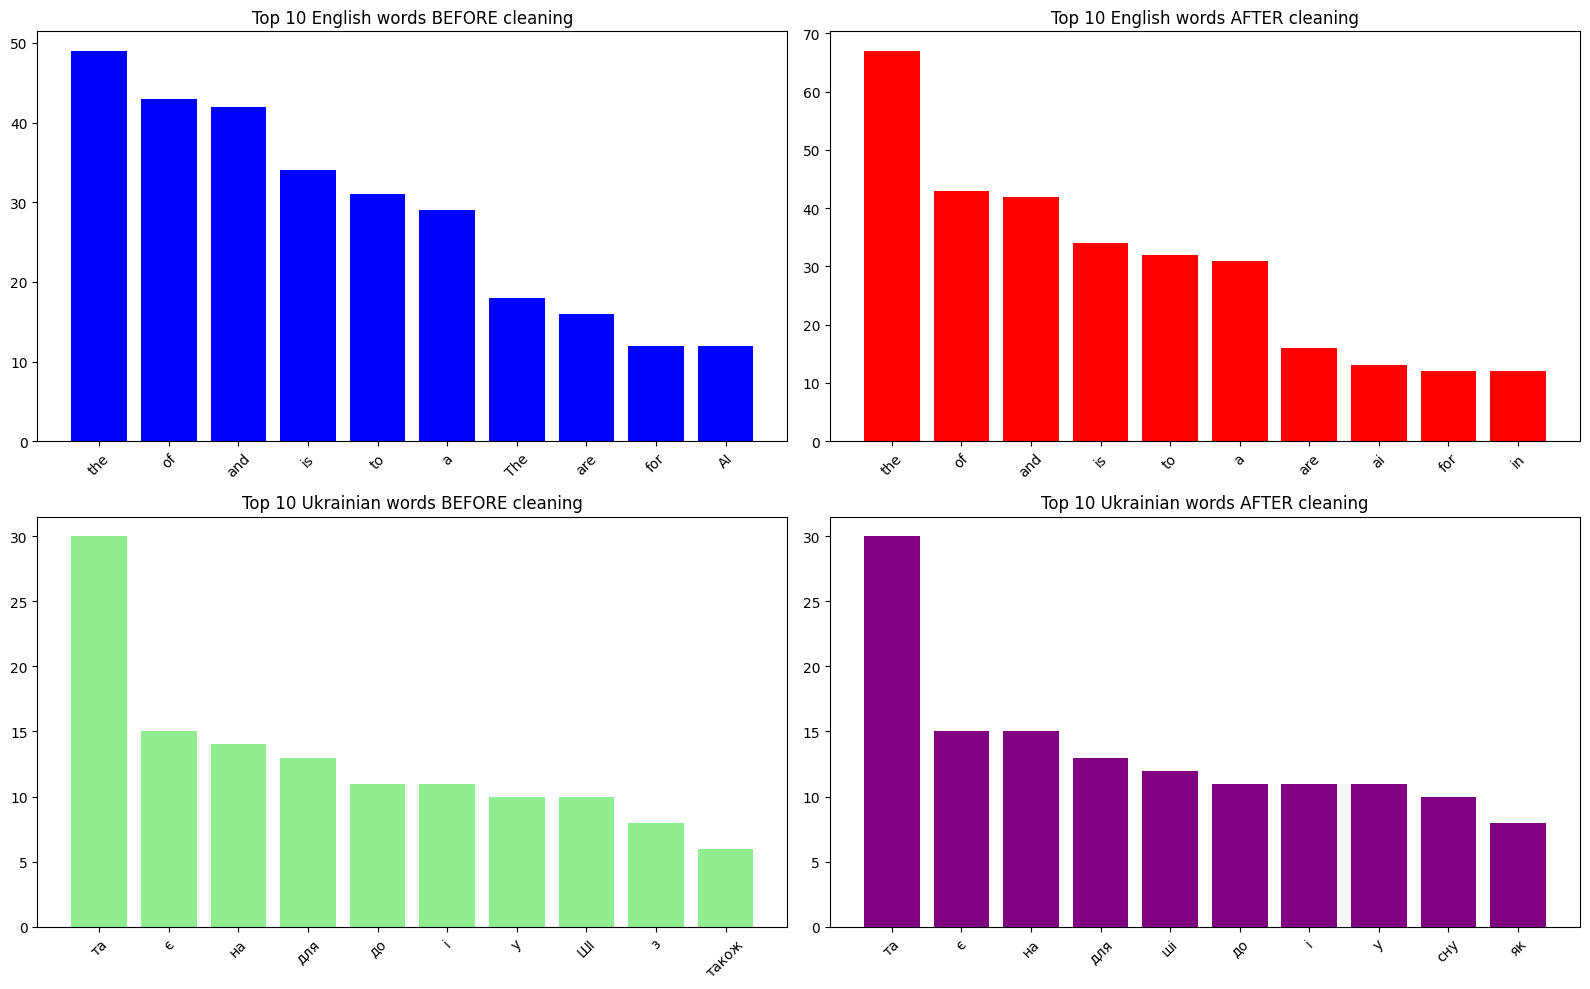

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from typing import List, Tuple

# --- 1. ДОПОМІЖНА ФУНКЦІЯ: Збір та підрахунок токенів ---
def get_top_tokens_data(tokens_list: List[List[str]]) -> Tuple[List[str], List[int]]:
    """Об'єднує списки токенів, підраховує 10 найпоширеніших і розділяє їх."""
    # Об'єднання всіх списків токенів в один плоский список
    all_tokens = [word for tokens in tokens_list for word in tokens]
    # Підрахунок 10 найпоширеніших
    freq_data = Counter(all_tokens).most_common(10)
    # Розпакування: слова та їхня кількість
    words, counts = zip(*freq_data)
    return list(words), list(counts)

# --- 2. ДОПОМІЖНА ФУНКЦІЯ: Побудова одного графіка ---
def plot_bar_chart(ax, words, counts, title, color):
    """Будує один стовпчастий графік із заданими параметрами."""
    ax.bar(words, counts, color=color)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# --- 3. КОНФІГУРАЦІЯ ТА ВИКОНАННЯ ---

# Створення списків токенів для стану "ДО очищення" (розбиття неочищеного тексту по пробілах)
tokens_en_before = df['text_en'].apply(str.split).tolist()
tokens_uk_before = df['text_uk'].apply(str.split).tolist()

# Визначення всіх 4 сценаріїв для ітерації
PLOT_CONFIG = [
    {
        'data_source': tokens_en_before,
        'title': 'Top 10 English words BEFORE cleaning',
        'color': 'blue',
        'position': (0, 0)
    },
    {
        'data_source': df['tokens_en'].tolist(),
        'title': 'Top 10 English words AFTER cleaning',
        'color': 'red',
        'position': (0, 1)
    },
    {
        'data_source': tokens_uk_before,
        'title': 'Top 10 Ukrainian words BEFORE cleaning',
        'color': 'lightgreen',
        'position': (1, 0)
    },
    {
        'data_source': df['tokens_uk'].tolist(),
        'title': 'Top 10 Ukrainian words AFTER cleaning',
        'color': 'purple',
        'position': (1, 1)
    },
]

# Ініціалізація вікна графіків
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Головний цикл: об'єднання обробки даних та побудови
for config in PLOT_CONFIG:
    # 1. Збір та підрахунок даних
    words, counts = get_top_tokens_data(config['data_source'])

    # 2. Визначення позиції графіка
    ax = axes[config['position']]

    # 3. Побудова графіка
    plot_bar_chart(ax, words, counts, config['title'], config['color'])

plt.tight_layout()
plt.show()

In [13]:
import spacy
import pandas as pd

# Завантаження моделей
!python -m spacy download uk_core_news_sm
!python -m spacy link uk_core_news_sm uk
nlp_en = spacy.load("en_core_web_sm")
nlp_uk = spacy.load("uk_core_news_sm")

# Словник для українських POS
pos_map_uk = {
    "ADJ": "прикметник",
    "ADP": "прийменник",
    "ADV": "прислівник",
    "AUX": "допоміжне дієслово",
    "CCONJ": "сполучник",
    "DET": "означений артикль/займенник",
    "INTJ": "вигук",
    "NOUN": "іменник",
    "NUM": "числівник",
    "PART": "частка",
    "PRON": "займенник",
    "PROPN": "ім’я власне",
    "PUNCT": "розділовий знак",
    "SCONJ": "підрядний сполучник",
    "SYM": "символ",
    "VERB": "дієслово",
    "X": "інше"
}

# Функції для обробки текстів
def process_en(text):
    doc = nlp_en(text)
    return {
        'tokens_en': [t.text for t in doc],
        'lemmas_en': [t.lemma_ for t in doc],
        'pos_en': [t.pos_ for t in doc],
        'dep_en': [t.dep_ for t in doc]
    }

def process_uk(text):
    doc = nlp_uk(text)
    pos_tags = []
    for t in doc:
        tag = t.morph.get("POS")
        if tag:
            pos_tags.append(pos_map_uk.get(tag[0], tag[0]))
        else:
            pos_tags.append(pos_map_uk.get(t.pos_, t.pos_))
    return {
        'tokens_uk': [t.text for t in doc],
        'lemmas_uk': [t.lemma_ for t in doc],
        'pos_uk': pos_tags,
        'dep_uk': [t.dep_ for t in doc]
    }

# Обробка англійських і українських текстів
df_en = df['text_en'].apply(process_en).apply(pd.Series)
df_uk = df['text_uk'].apply(process_uk).apply(pd.Series)

# Додаємо результати до основного DataFrame
df = pd.concat([df, df_en, df_uk], axis=1)

df.head()

  Using cached https://github.com/explosion/spacy-models/releases/download/uk_core_news_sm-3.8.0/uk_core_news_sm-3.8.0-py3-none-any.whl (14.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('uk_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
⚠ As of spaCy v3.0, model symlinks are not supported anymore. You can
load trained pipeline packages using their full names or from a directory
path.


,doc_id,text_en,text_uk,clean_en,clean_uk,tokens_en,tokens_uk,len_tokens_en,len_tokens_uk,diff_len,match_percent,tokens_en,lemmas_en,pos_en,dep_en,tokens_uk,lemmas_uk,pos_uk,dep_uk
0,doc1,"Sleep is a fundamental biological necessity, n...",Сон є фундаментальною біологічною необхідністю...,sleep is a fundamental biological necessity no...,сон є фундаментальною біологічною необхідністю...,"[sleep, is, a, fundamental, biological, necess...","[сон, є, фундаментальною, біологічною, необхід...",255,234,21,91.76,"[Sleep, is, a, fundamental, biological, necess...","[sleep, be, a, fundamental, biological, necess...","[NOUN, AUX, DET, ADJ, ADJ, NOUN, PUNCT, PART, ...","[nsubj, ROOT, det, amod, amod, attr, punct, ne...","[Сон, є, фундаментальною, біологічною, необхід...","[сон, бути, фундаментальний, біологічний, необ...","[іменник, допоміжне дієслово, прикметник, прик...","[nsubj, cop, amod, amod, ROOT, punct, cc, advm..."
1,doc2,The automotive industry is currently undergoin...,Автомобільна промисловість наразі переживає ма...,the automotive industry is currently undergoin...,автомобільна промисловість наразі переживає ма...,"[the, automotive, industry, is, currently, und...","[автомобільна, промисловість, наразі, пережива...",254,214,40,84.25,"[The, automotive, industry, is, currently, und...","[the, automotive, industry, be, currently, und...","[DET, ADJ, NOUN, AUX, ADV, VERB, DET, ADJ, NOU...","[det, amod, nsubj, aux, advmod, ROOT, det, amo...","[Автомобільна, промисловість, наразі, пережива...","[автомобільний, промисловість, наразі, пережив...","[прикметник, іменник, прислівник, дієслово, пр...","[amod, nsubj, advmod, ROOT, amod, obj, punct, ..."
2,doc3,"The Great Barrier Reef, located off the coast ...","Великий Бар'єрний риф, розташований біля узбер...",the great barrier reef located off the coast o...,великий бар'єрний риф розташований біля узбере...,"[the, great, barrier, reef, located, off, the,...","[великий, бар'єрний, риф, розташований, біля, ...",244,215,29,88.11,"[The, Great, Barrier, Reef, ,, located, off, t...","[the, Great, Barrier, Reef, ,, locate, off, th...","[DET, PROPN, PROPN, PROPN, PUNCT, VERB, ADP, D...","[det, compound, compound, nsubj, punct, acl, p...","[Великий, Бар'єрний, риф, ,, розташований, біл...","[великий, бар'єрний, риф, ,, розташований, біл...","[прикметник, прикметник, іменник, розділовий з...","[amod, amod, nsubj, punct, amod, case, obl, nm..."
3,doc4,"Artificial Intelligence, or AI, refers to the ...","Штучний інтелект, або ШІ, стосується симуляції...",artificial intelligence or ai refers to the si...,штучний інтелект або ші стосується симуляції п...,"[artificial, intelligence, or, ai, refers, to,...","[штучний, інтелект, або, ші, стосується, симул...",239,214,25,89.54,"[Artificial, Intelligence, ,, or, AI, ,, refer...","[Artificial, Intelligence, ,, or, AI, ,, refer...","[PROPN, PROPN, PUNCT, CCONJ, PROPN, PUNCT, VER...","[compound, nsubj, punct, cc, conj, punct, ROOT...","[Штучний, інтелект, ,, або, ШІ, ,, стосується,...","[штучний, інтелект, ,, або, ші, ,, стосуватися...","[прикметник, іменник, розділовий знак, сполучн...","[amod, nsubj, punct, cc, conj, punct, ROOT, ob..."
4,doc5,Coffee is one of the world's most popular beve...,Кава є одним із найпопулярніших напоїв у світі...,coffee is one of the world's most popular beve...,кава є одним із найпопулярніших напоїв у світі...,"[coffee, is, one, of, the, world's, most, popu...","[кава, є, одним, із, найпопулярніших, напоїв, ...",259,208,51,80.31,"[Coffee, is, one, of, the, world, 's, most, po...","[coffee, be, one, of, the, world, 's, most, po...","[NOUN, AUX, NUM, ADP, DET, NOUN, PART, ADV, AD...","[nsubj, ROOT, attr, prep, det, poss, case, adv...","[Кава, є, одним, із, найпопулярніших, напоїв, ...","[кава, бути, одним, із, найпопулярніший, напій...","[іменник, допоміжне дієслово, означений артикл...","[nsubj, cop, ROOT, case, amod, nmod, case, nmo..."


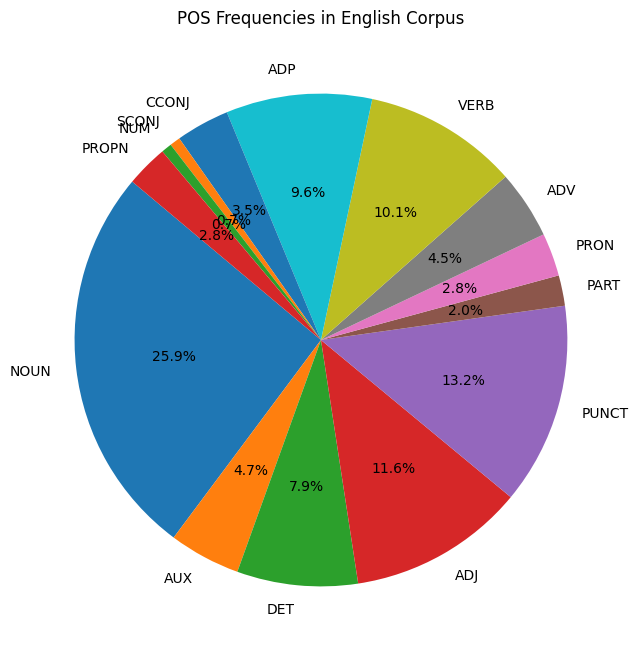

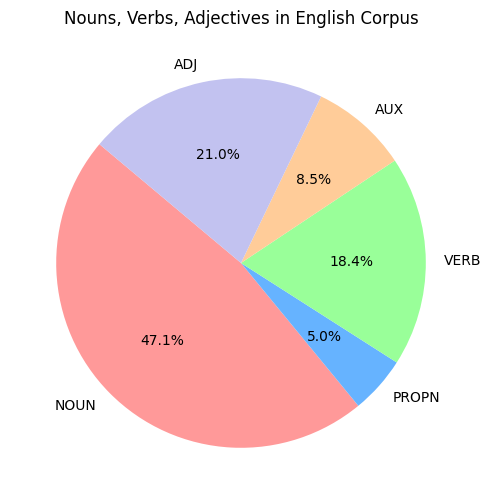

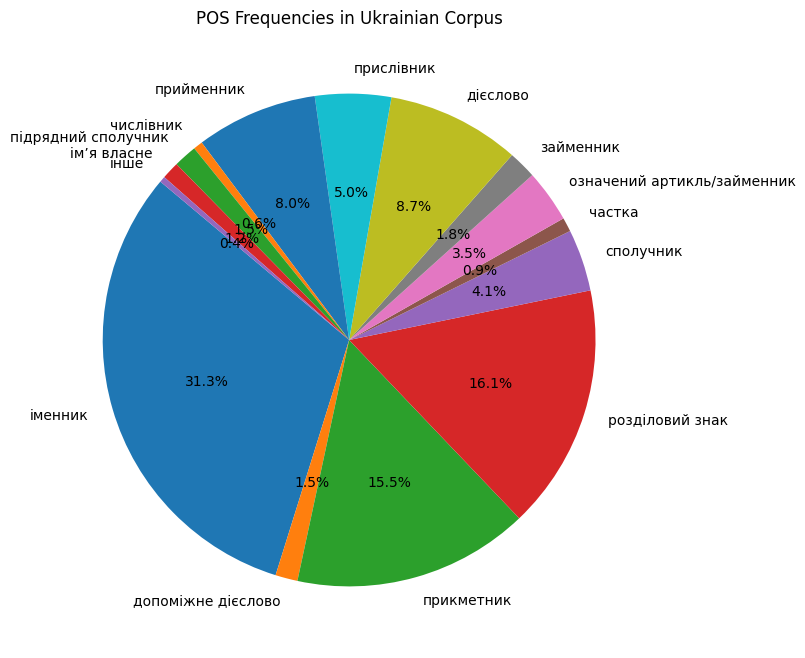

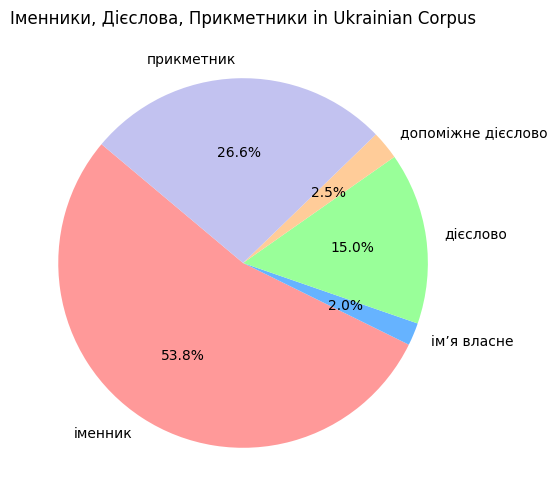

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from typing import List, Dict

# --- 1. ДОПОМІЖНА ФУНКЦІЯ: Обробка та побудова графіків ---
def plot_pos_analysis(
    pos_column: pd.Series,
    target_pos_list: List[str],
    lang_name: str,
    colors: List[str]
):
    """
    Виконує повний POS-аналіз (підрахунок та 2 кругові діаграми) для одного стовпця.

    :param pos_column: Стовпець DataFrame зі списками POS-тегів.
    :param target_pos_list: Список основних POS-тегів для фокусування.
    :param lang_name: Назва мови для заголовків.
    :param colors: Кольори для цільової діаграми.
    """

    # 1. Зведення та підрахунок
    all_pos = [pos for sublist in pos_column for pos in sublist]
    pos_counts = Counter(all_pos)

    # 2. Кругова діаграма для ВСІХ POS
    plt.figure(figsize=(8, 8))
    plt.pie(pos_counts.values(), labels=pos_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f"POS Frequencies in {lang_name} Corpus")
    plt.show()

    # 3. Підготовка даних для ЦІЛЬОВИХ POS
    target_counts = {k: pos_counts.get(k, 0) for k in target_pos_list}
    # Фільтруємо нульові значення
    target_counts = {k: v for k, v in target_counts.items() if v > 0}

    # 4. Кругова діаграма для ЦІЛЬОВИХ POS
    if target_counts:
        plt.figure(figsize=(6, 6))
        plt.pie(target_counts.values(), labels=target_counts.keys(),
                autopct='%1.1f%%', startangle=140, colors=colors)
        plt.title(f"{'Nouns, Verbs, Adjectives' if lang_name == 'English' else 'Іменники, Дієслова, Прикметники'} in {lang_name} Corpus")
        plt.show()

# --- 2. КОНФІГУРАЦІЯ ТА ВИКЛИК ---
TARGET_COLORS = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Англійські POS (скорочення spaCy)
target_pos_en = ['NOUN', 'PROPN', 'VERB', 'AUX', 'ADJ']
plot_pos_analysis(
    pos_column=df['pos_en'],
    target_pos_list=target_pos_en,
    lang_name='English',
    colors=TARGET_COLORS
)

# Українські POS (перекладені назви)
target_pos_uk = ['іменник', 'ім’я власне', 'дієслово', 'допоміжне дієслово', 'прикметник']
plot_pos_analysis(
    pos_column=df['pos_uk'],
    target_pos_list=target_pos_uk,
    lang_name='Ukrainian',
    colors=TARGET_COLORS
)